In [1]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import os
from PIL import Image
import rasterio

In [2]:
base_dir = '/home/daric/dev/data/nigeria/geotiffs/'
img_dir = 'multi_spectral'
#img_file = '19MAY27102816-M2AS-014909258010_01_P001.TIF'
#img_file = '19MAY27102817-M2AS-014909262010_01_P001.TIF'
#img_file = '20FEB22101135-M2AS-014909251010_01_P001.TIF'
#img_file = '21FEB25101358-M2AS-014909264010_01_P001.TIF'
#img_file = '21NOV03101658-M2AS-014909259010_01_P001.TIF'
img_file = '21DEC30101738-M2AS-014909260010_01_P001.TIF'
#img_file = '22JAN22102131-M2AS-014909261010_01_P001.TIF'
img_path = os.path.join(base_dir, img_dir, img_file)
img = rasterio.open(img_path)

In [3]:
green_band = img.read(3)
red_band = img.read(4)
nir_band = img.read(8)

In [4]:
# Normalized Difference Index
def compute_ndi(band_a, band_b):
    numerator = band_a - band_b
    denominator = band_a + band_b
    numerator[np.isclose(denominator, np.zeros(denominator.shape))] = 0
    denominator[np.isclose(denominator, np.zeros(denominator.shape))] = 1
    return numerator / denominator

In [5]:
# Normalized Difference Water Index (NDWI)
ndwi = compute_ndi(green_band, nir_band)
water_thresh = 0.3
water_mask = np.ma.masked_greater_equal(ndwi, water_thresh)

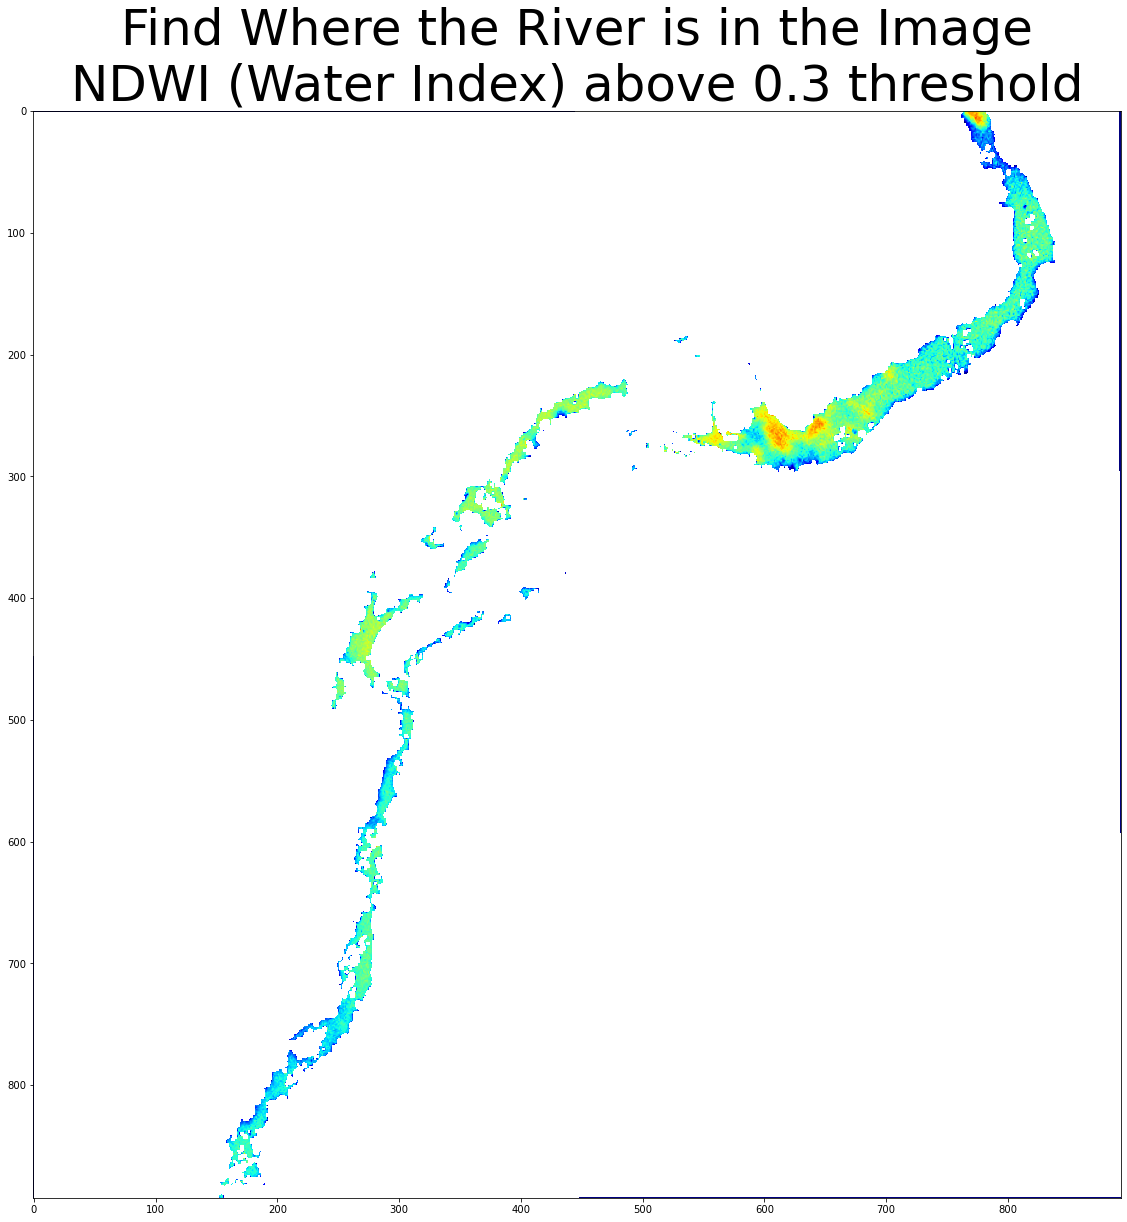

In [6]:
plt.figure(figsize = (20,20))
plt.title('Find Where the River is in the Image\nNDWI (Water Index) above ' + str(water_thresh) + ' threshold', fontsize=50)
plt.imshow(water_mask, cmap='jet')

In [7]:
# Normalized Difference turbidity Index (NDTI)
ndti = compute_ndi(red_band, green_band)
turbid_mask = np.ma.masked_array(ndti, mask=water_mask.mask)

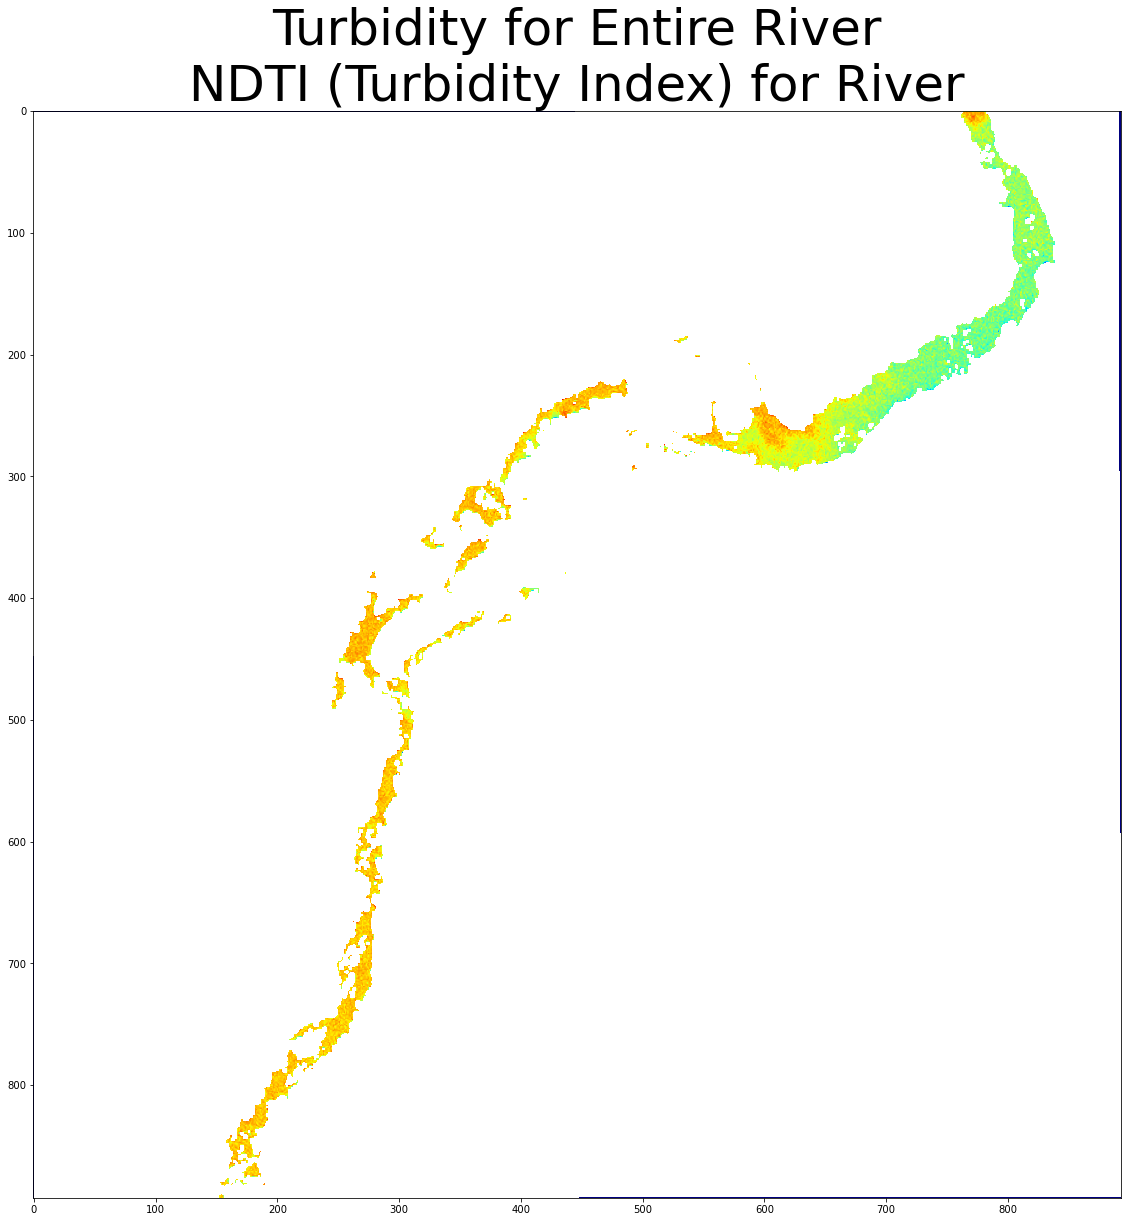

In [8]:
plt.figure(figsize = (20,20))
plt.title('Turbidity for Entire River\nNDTI (Turbidity Index) for River', fontsize=50)
plt.imshow(turbid_mask, cmap='jet')

In [9]:
quant = 0.9
high_turbid_mask = np.ma.masked_less(turbid_mask, np.quantile(turbid_mask, quant))

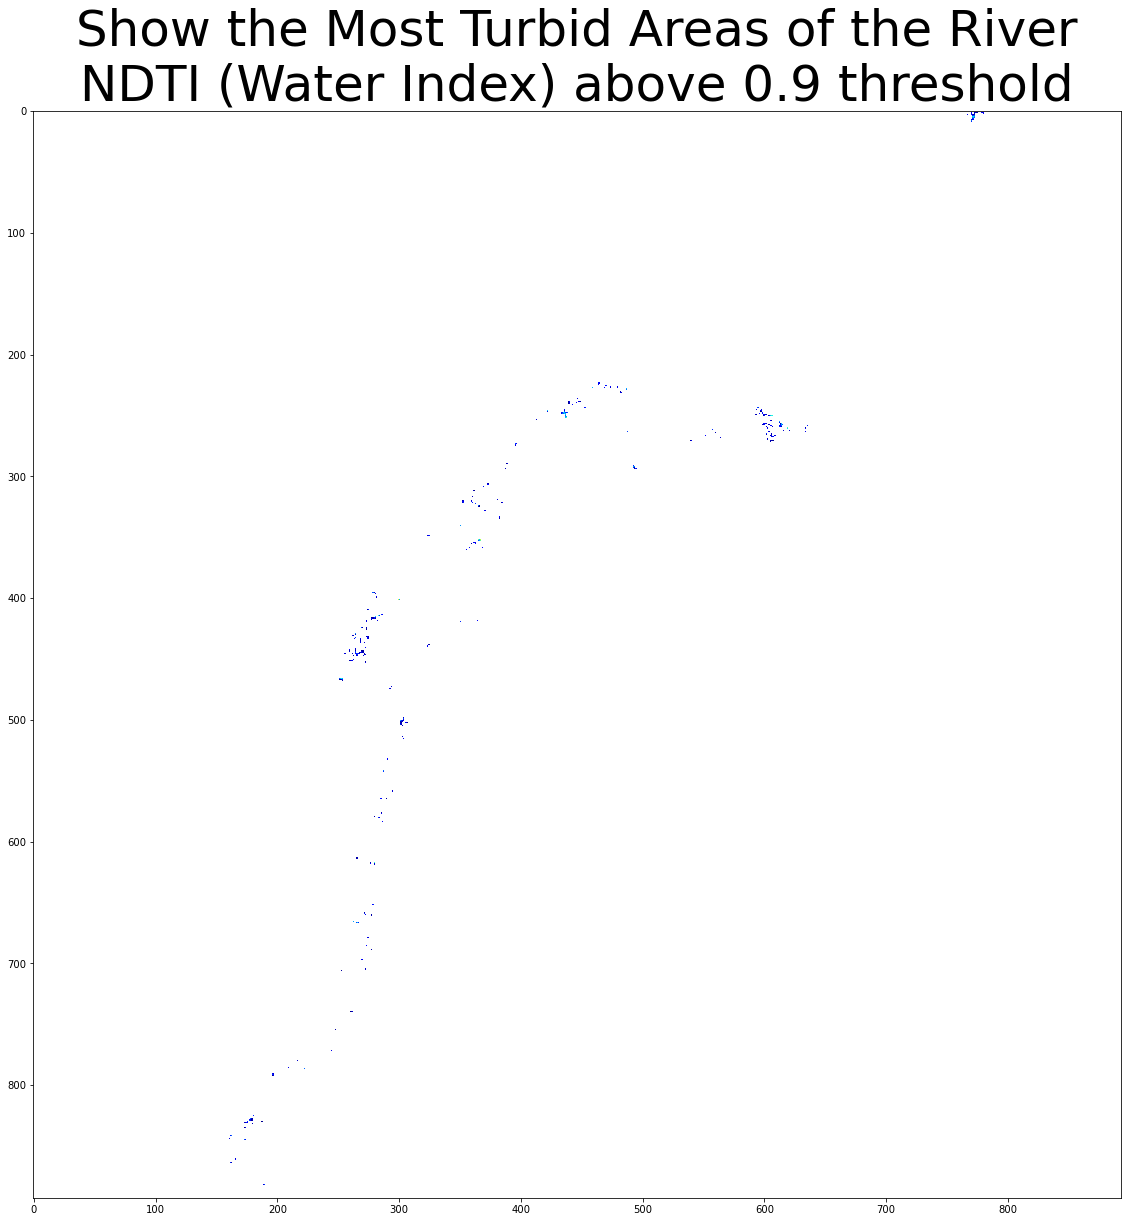

In [10]:
plt.figure(figsize = (20,20))
plt.title('Show the Most Turbid Areas of the River\nNDTI (Water Index) above ' + str(quant) + ' threshold', fontsize=50)
plt.imshow(high_turbid_mask, cmap='jet')